# Исследование успешности компьютерных игр 

<b>Описание проекта</b>\
У нас есть данные до 2016 года о компьютерных играх интернет-магазина Стримчик, который продает их по всему миру. Данные содержат - информацию о продажах игр, оценке пользователей и экспертов, жанрах и платформах.

<b>Наша задача</b>\
Cпланировать рекламную компанию на 2017 год и определить какие игры являются наиболее успешными и популярными.

<b>Ход исследования</b>
- Обзор данных
- Подготовка данных
- Проведение исследовательского анализа данных
- Составление портрета пользователя по каждому региону
- Проверка гипотез
- Вывод


<b>Описание данных</b>\
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

Аббревиатура ESRB - это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## 1. Открытие файла с данными и изучение основной информации

In [1]:
import pandas as pd #подключаем библиотеку pandas
import matplotlib.pyplot as plt #подключим библиотеку для построения графиков
import numpy as np #подключим библиотеку numpy
import seaborn as sns #импортируем библиотеку seaborn

In [2]:
#откроем файл и определим название датафремйма как data
try:
    data = pd.read_csv(r'C:\Users\Irina\Desktop\Analitic_projects\datasets\games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
    
data.head(10) #откроем первые 10 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info() #посмотрим что представляют из себя данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


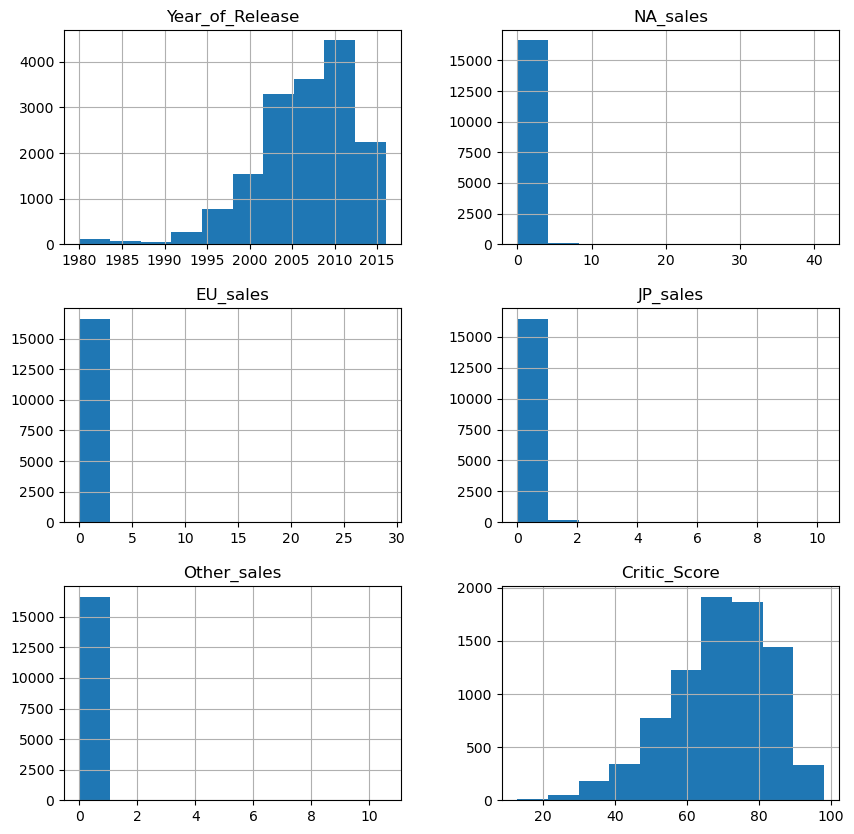

In [4]:
data.hist(figsize=(10, 10)); #строим гистограммы для всего датафрейма

Просмотрев все гистограммы видим, что получились вполне реальные ожидаемые значения. Сильных аномальных всплексов на первый взгляд невидно. Также распределения стремятся или к нормальному, или для продаж пик приходятся в местах более детального исследования .

In [5]:
#проверим датафрейм на наличие явных дубликатов
data.duplicated().sum()

0

Здорово! Явные дубликаты отсутствуют.

<b>Вывод:</b>\
Мы просмотрели данные - 16715 строк и 11 столбцов, данные отображаются корректно, дубликатов явных нет, на графиках неожиданностей никаких не замечено, есть пропуски в некоторых столбцах.
Теперь можем переходить в предобработке полученных данных.

## 2. Предобработка данных

In [6]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена типов данных в столбцах

Данные в столбце year_of_release заменяем на целочисленные значения, поскольку год выпуска может быть только целым числом.

In [7]:
#заменяем тип данных в столбце year_of_release

print(data['year_of_release'].unique()) #определяем уникальные значения
data['year_of_release'].isna().sum() #узнаем кол-во пропусков в столбце year_of_release

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


269

In [8]:
#посчитаем в процентном соотношении долю пропусков в столбце year_of_release
(data['year_of_release'].isna().sum()) * 100 / (data['year_of_release'].count()) 

1.635656086586404

Пропуски в столбце year_of_release мешают нам сразу же заменить на тип данных int. Для легкой замены типа данных на Int удалим все строки где встречаемся Nan. Поскольку этих строк незначительное кол-во всего 1,6%

In [9]:
#удалим строки со значениями Nan в столбце year_of_release
data = data.dropna(subset=['year_of_release'])

#проверим не осталось ли пропусков
print(data['year_of_release'].isna().sum())

#переводим тип данных в int
data['year_of_release'] = data['year_of_release'].astype('int') 

0


Пропуски успешно удалили.

Проверяем на число пропусков и в столбце critic_score.

In [10]:
print(data['critic_score'].unique()) #определяем уникальные значения
data['critic_score'].isna().sum() #узнаем кол-во пропусков в столбце year_of_release

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]


8463

Отсутствующих значений 50%, удалить их мы никак не можем, 
поэтому их можем или заменить на "заглушку", или оставить как есть.

Если заменить Nan на заглушку:
Любая заглушка позволит нам проводить мат операции с данными, но есть подводные камни -  можем случайно забыть отфильтровать данные с заглушкой и тогда это может исказить анализ (графики будут со смещенными значениями).

Поэтому выбираем вариант оставить пропуски как есть с Nan, не удаляя и не заменяя. 
Пропуски не позволяют нам изменить тип данных, поэтому он остается прежним.

Другие числовые данные (типы sales и user_score) нет смысла изменять, поскольку они являются веществ числами и содержат дробную часть.

Тип object также оставляем без изменений.

### Обработка пропусков

In [11]:
#определим кол-во пропусков по каждому столбцу датафрейма
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

По 2 пропуска в столбцах name и genre. Посмотрим что это за строки:

In [12]:
#выведем на экран строки с пропусками в столбце name
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуск в имени совпадаем с пропуском в жанре - это одни и те же строки. Оба пропуска относятся к платформе GEN 1993 года. Они не имеют оценки пользователей и рейтинг у них отсутствует.
И продаж у них было не там много в разных странах.
Смею предположить, что названия с низкими показателями по продажам не были задействованы в рейтингах и  оценках, т.е. это совсем малоизвестные игры.
Удалим эти 2 значения, они не повлияют на дальнейший анализ.

In [13]:
#удалим строки, где встречаются пропуски в столбце name
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Мы сохранили пропуски в столбце critic_score. По тем же причинам оставим пропуски с Nan и для столбца user_score.

Пропусков в столбце rating порядка 40% от общего числа строк. 
Скорее всего данные столбцы не обязательны к заполнению, поэтому заполняются не так часто.
Удалять строки мы не будем точно, заменим лишь значение  в нем на "unknown".

In [14]:
#заменяем Nan в столбце rating на 'unknown'
data['rating'] = data['rating'].fillna('unknown')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [15]:
#посмотрим какие значения вообще присутствуют в столбце рейтинга
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [16]:
#определим количество каждого значения
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Видно, что 4 последних значения встречаются крайне редко. Их можно исключить, они не повлияют кардинально 
на наш дальнейший анализ.

In [17]:
#удалим строки с малых количеством значений
data = data.query('rating == ("E", "T", "M", "E10+", "unknown")')
#проверим что осталось после удаления
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
Name: rating, dtype: int64

In [18]:
#выведем список уникальных значений столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Выявили неожиданное значение tbd в оценке пользователей. 

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Скорее всего это значение означает, что пользователи еще не успели выставить свои оценки, но они ожидаются в ближайшее время.

In [19]:
#определим сколько строк со значением tbd
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2369

Эти значения мы не будем удалять, оставим их в датафрейме, но заменим tbd значением NaN. \
Т.к. это значение мы еще не знаем и оно по сути ничем не отличается от NaN. \
А для того, чтобы наши данные не исказились, переведем в Nan и будем считать обычным пропуском. 

In [20]:
#заменим значение в столбце name tbd на Nan
data.loc[data['user_score'] == 'tbd'] = np.nan
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
data.info() #проверим сколько и каких данных у нас содержит датафрейм

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14062 non-null  object 
 1   platform         14062 non-null  object 
 2   year_of_release  14062 non-null  float64
 3   genre            14062 non-null  object 
 4   na_sales         14062 non-null  float64
 5   eu_sales         14062 non-null  float64
 6   jp_sales         14062 non-null  float64
 7   other_sales      14062 non-null  float64
 8   critic_score     6924 non-null   float64
 9   user_score       7457 non-null   object 
 10  rating           14062 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Итак, мы добились того результата, которого хотели. Еще нам осталось добавить столбец с общими продажами, 
чтобы в дальнейшем было проще работать с данными.

### Суммарные продажи

In [22]:
#Добавим новый столбец, в котором выведем количество продаж по всем регионам
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<b>Вывод:</b>\
Итак, мы прошлись внимательно по всем столбцам, удалили лишние значения, сохранили пропуски с Nan в столбцах critic_score и user_score для точности дальнейшего анализа. 
Теперь можно приступать к расчетам.


## Исследовательский анализ


### Проверим сколько игр выпускалось в разные годы

Первый год исследований 1980.0


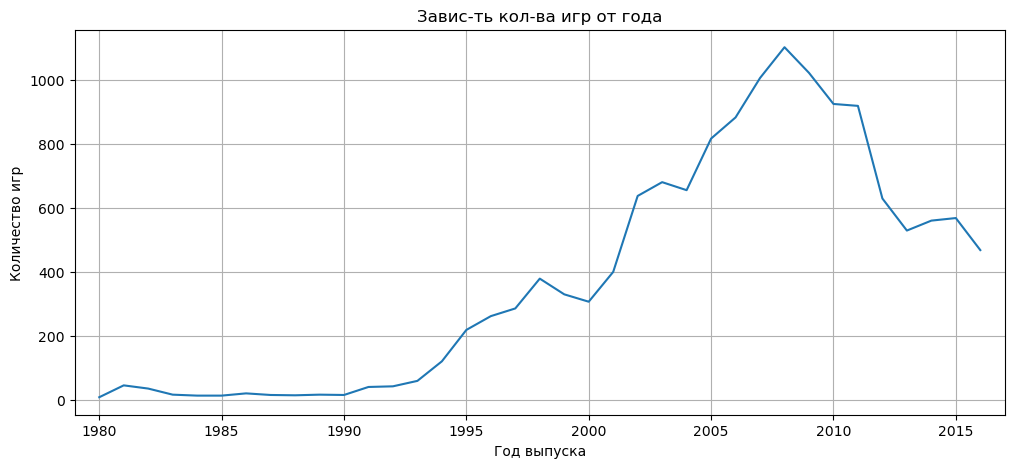

In [23]:
#определим самый первый год исследований, исключая 0 - нашу заглушку
print('Первый год исследований', (data.query('year_of_release != 0')['year_of_release'].min()))

#построим график зависимости количества игр от ее года выпуска
data.groupby('year_of_release')['name'].agg('count')\
.plot(\
      xlim=(1979, 2017),\
      grid=True,\
      figsize=(12, 5),\
     title='Завис-ть кол-ва игр от года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

Данные представлены за годы - с 1980 по 2016, причем в 2016 году были неполные данные.
С 1980 года по 1995 год только зарождалась индустрия компьютерных игр, и их было мало - до 200. Считаю, что можно исключить из анализа данные до 1995 года.

С 1995 года был плавный рост игр до пика в 2007 году. Также есть незначительный всплекс в 2002 году. Интересно, что в этом году выпустилось?

Пик компьютерных игр пришелся на 2007-2008 годы. За эти 2 года выпускалось по 1400 игр. Ну и далее идет спад игромании до 600 игр за год.

### Распределение суммы продаж по платформам

In [24]:
#сформируем сводную таблицу по ТОП-10 платформам, в которых были самые крупные продажи во всех регионах
data_top10_pivot = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False).head(10)
data_top10_pivot

,sum_sales
platform,
PS2,1170.95
X360,948.74
PS3,921.09
Wii,791.91
PS,712.35
DS,655.36
PS4,314.00
PSP,273.11
GBA,263.70


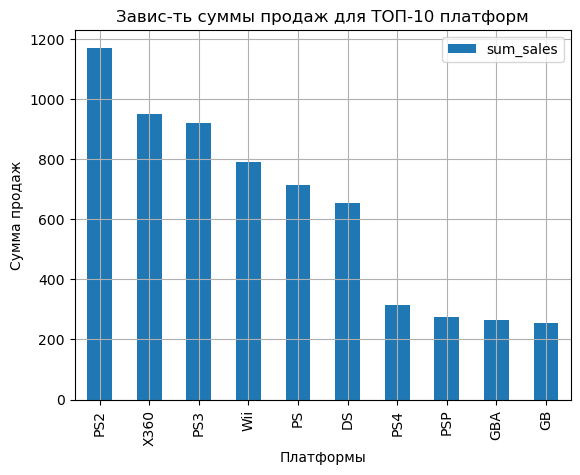

In [25]:
#построим график зависимости суммарных продаж от ТОП-10 платформ
data_top10_pivot\
.plot(kind='bar', grid=True,\
                title='Завис-ть суммы продаж для ТОП-10 платформ')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж');


Из графика видно, что первые 6 платформ давали самые высокие результаты, для дальнейших исследований будем использовать только их.

In [26]:
#переименуем сводную таблицу, сохранив лишь ТОП-6 платформ
data_top10_pivot2 = data_top10_pivot.head(6)
data_top10_pivot2

,sum_sales
platform,
PS2,1170.95
X360,948.74
PS3,921.09
Wii,791.91
PS,712.35
DS,655.36


In [27]:
#сделаем срез датафрейма, где отображаются лишь ТОП-6 платформ
top_platform = data.query('platform in @data_top10_pivot2.index')
top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


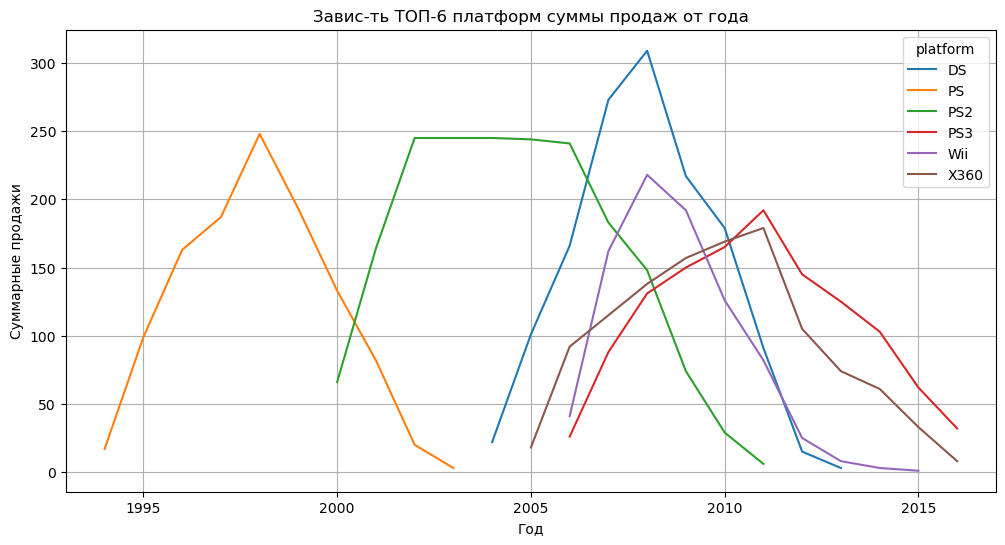

In [28]:
#построим графики зависимостей распределения ТОП-6 платформ суммарной продажи от года 
top_platform.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='count')\
.plot(xlim=(1993, 2017), figsize=(12,6),grid=True)
plt.title('Завис-ть ТОП-6 платформ суммы продаж от года')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

Как видно из графика, средняя продолжительность жизни платформы - около 10 лет. 

Только у одной из топовых платформ PS продажи длились почти 20 лет. Полагаю, что это связано с тем, что она была одной из первых платформ в эпоху "рождения клмпьютерных игр", поэтому и была популярной столько долгое время.
Но нам нужен анализ на 2017 год, и все остальные платформы "жили" 10 лет. 

Также стоит заметить, что только 3 платформы из 6 актуальны с 2013 года (были продажи), и даже они на самом спаде своего цикла жизни.

3 платформы - PS3, Wii, X360

### Актуальный период для анализа

Именно этот график дает понять, что для правильного маркетингового анализа на 2017 год не стоит выбирать слишком большой промежуток времени.

Я бы рассмотрела в качестве актуального промежутка времени период с 2013 года по 2016 год, не более.
Потому что эти топовые платформы отмирают, и на их смену как раз в последние 2-3 года приходят новые "восходящие" платформы, которые еще не успели набрать слишком много продаж.

### Потенциально прибыльные платформы

Итак, нужно немного скорректировать срезы данных. Потому что для анализа на 2017 год нам нужен как раз актуальный период, а не все года. Также по графикам видно, что в последние годы Топовые платформы отмирают, и на их смену приходят восходящие звезды (потенц прибыльные платформы). Их нам и надо сейчас отыскать.

In [29]:
#определим какие платформы продавались с 2013 года и какая сумма продаж была за каждый год
data.query('year_of_release >= 2013')\
.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')

year_of_release,2013.0,2014.0,2015.0,2016.0
platform,,,,
3DS,56.32,43.07,27.21,15.10
DS,0.97,NaN,NaN,NaN
PC,12.38,13.25,8.49,5.22
PS3,113.24,47.40,16.30,3.16
PS4,25.99,100.00,118.86,69.15
PSP,3.14,0.24,0.12,NaN
PSV,10.59,11.90,5.95,4.24
Wii,8.11,2.61,0.15,NaN
WiiU,21.65,22.01,16.27,4.30


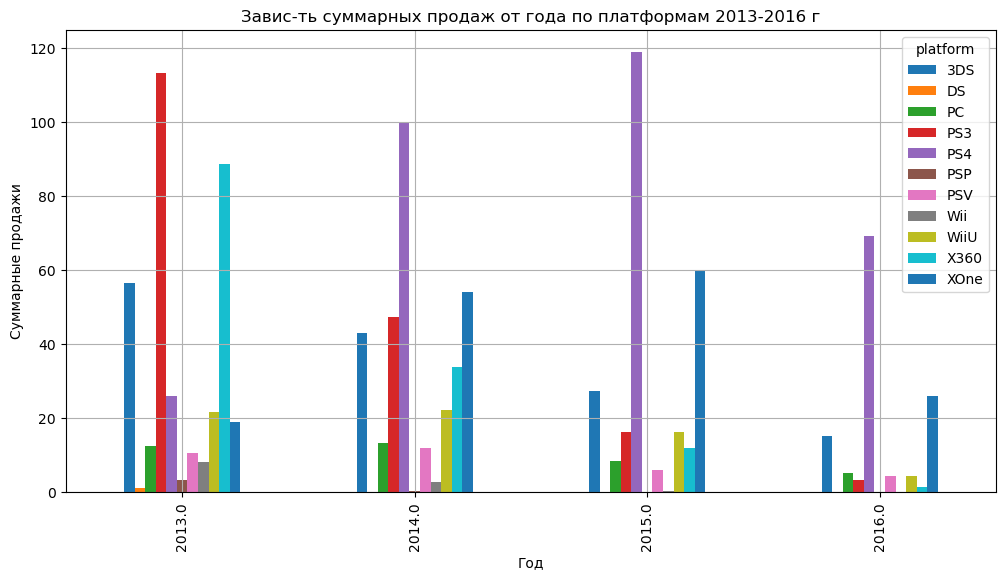

In [30]:
#построим гистограмму, отображающую за каждый год сумму продаж для каждой платформы
data.query('year_of_release >= 2013')\
.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')\
.plot(kind='bar', grid=True, figsize=(12,6))
plt.title('Завис-ть суммарных продаж от года по платформам 2013-2016 г')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи');

По таблице и гистограммам понятно, что часть платформ не набирает больших оборотов в посление годы. Теперь займемся определением ТОП-5 потенциальных платформ, у которых самые крупные продажи были с 2013 года. 

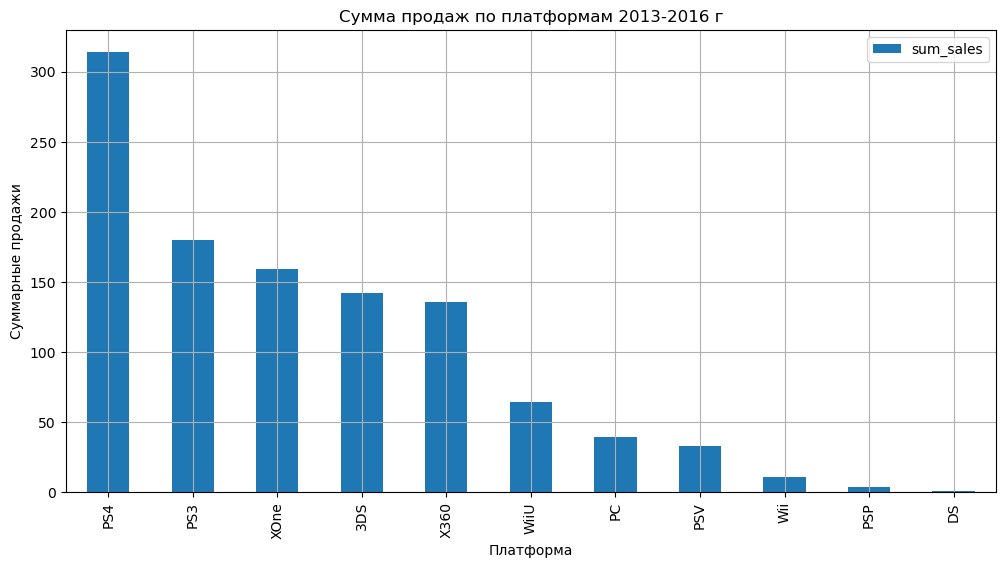

In [31]:
#построим гистограмму, отображающую сумму продаж всех платформ, начиная с 2013 года
data.query('year_of_release >= 2013')\
.pivot_table(index='platform', values='sum_sales', aggfunc='sum')\
.sort_values(by='sum_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(12,6))
plt.title('Сумма продаж по платформам 2013-2016 г')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи');

Итак, ТОП-5 потенц платформ - PS4, PS3, XOne, 3DS, X360. Их и будем анализировать далее.

Почти по всем лидирующим платформам падают показатели. Они находятся на спаде. Я выделила бы отдельно лидера PS4 - у него в 2015 году было пиковое значение, 2016 небольшой спад, но при этом на него я бы сделала самую большую ставку, как лидера продаж.

### Ящик с усами по лидирующим платформам

In [32]:
#зададим новую переменную для лидирующих платформ
top5_platform = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
#сделаем срез датафрейма по лидирующим платформам
data_top5 = data.query('platform in @top5_platform')
data_top5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63


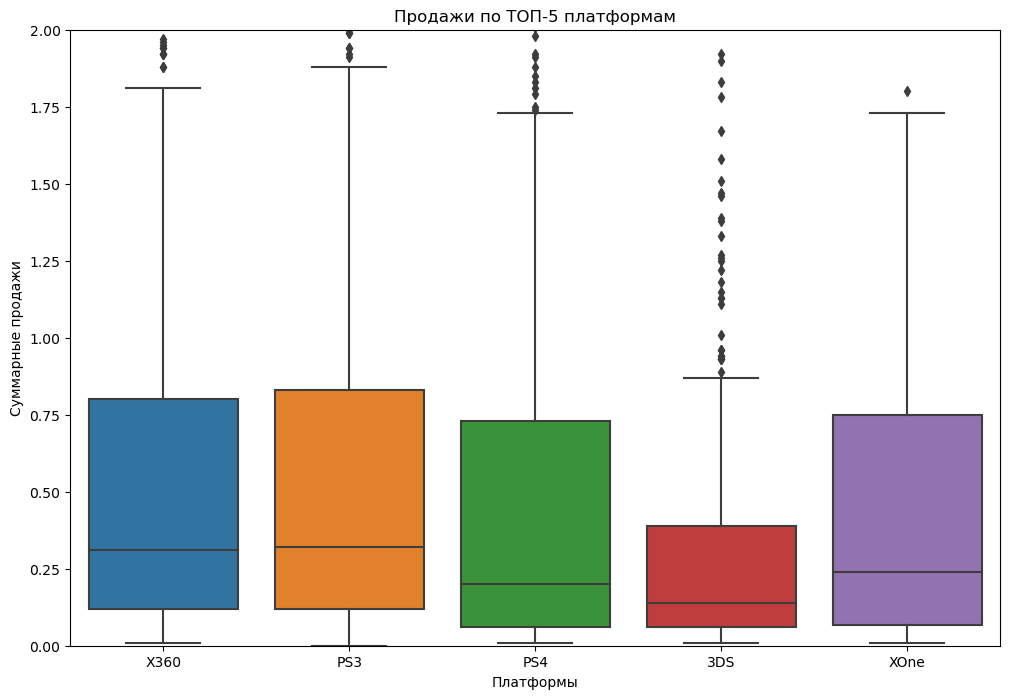

In [33]:
#построим яшики с усами от суммы продаж по ТОП-5 платформам 
plt.figure(figsize=(12,8))
sns.boxplot(data=data_top5, x='platform', y='sum_sales')\
    .set(title='Продажи по ТОП-5 платформам', xlabel='Платформы', ylabel='Суммарные продажи', ylim=(0,2));

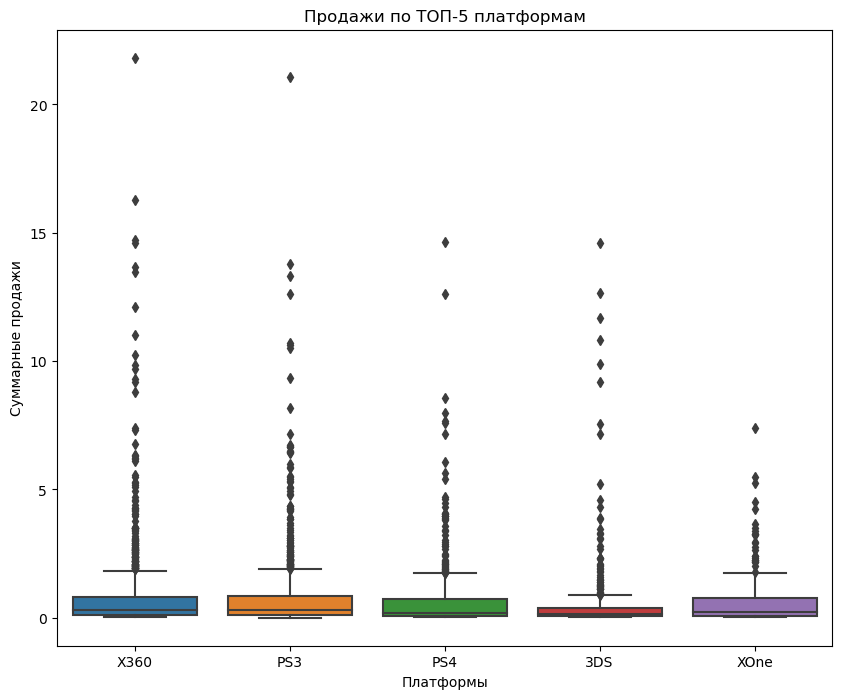

In [34]:
#построим в меньшем масштабе график, чтобы увидеть как распределены выбросы
plt.figure(figsize=(10,8))
sns.boxplot(data=data_top5, x='platform', y='sum_sales')\
    .set(title='Продажи по ТОП-5 платформам', xlabel='Платформы', ylabel='Суммарные продажи');

Как видно из графика из 5 топовых платформ выделается не в лучшую сторону только одна - 3DS. 
У нее самое минимальное значение медианы, а также ниже показатели 3-его квартиля и самого правого уса также. Это означает, что у этой платформы самые низкие показатели по продажам из остальных.
эту платформы я бы исключила из прогноза на 2017 год.

Остальные 4 платформы имеют очень схожие показатели и их можно однозначно использовать в прогнозе на 2017 год.
Лидируют - X360 и PS3, далее совсем немного ниже медиана и Q1 - у PS4 и XOne.
У этих двух лидеров, если посмотреть на их выбросы - приходятся самые крупные продажи.

### Диаграмма рассеяния. Влияние отзывов

#### X360

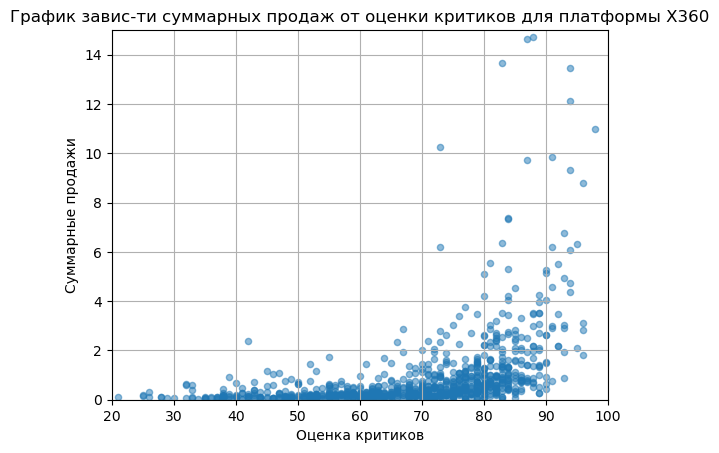

In [35]:
#выберем платформу X360 и построим для нее график завис-ти суммарных продаж от оценки критиков
data_top5.query('platform == "X360"')\
.plot(x='critic_score', y='sum_sales', kind='scatter',\
      grid=True, alpha=0.5, xlim=(20, 100), ylim=(0, 15))
plt.title('График завис-ти суммарных продаж от оценки критиков для платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи');

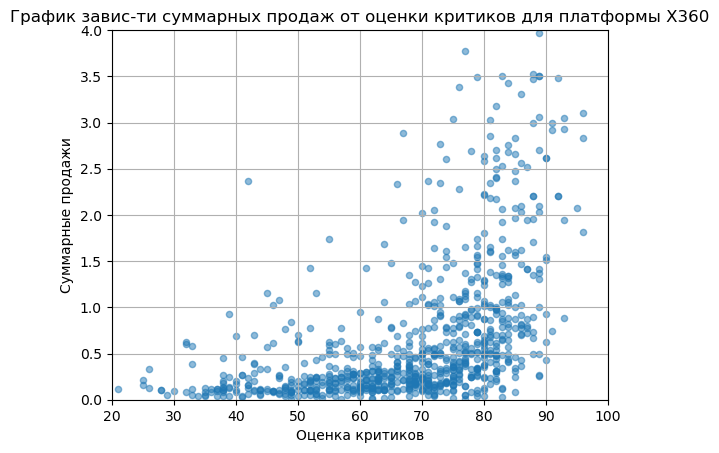

In [36]:
# аналогичный график в более укрупненном масштабе
data_top5.query('platform == "X360"')\
.plot(x='critic_score', y='sum_sales', kind='scatter', \
      grid=True, alpha=0.5, xlim=(20, 100), ylim=(0, 4))
plt.title('График завис-ти суммарных продаж от оценки критиков для платформы X360')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи');

По графику видно, что корреляция есть. но не такая большая. Имеется положительная корреляция.
При значениях оценки от 20 до 80 наблюдается линейная положит зависимость. 
При оценке более 80 идет резкий скачок в сторону увеличения продажи.

In [37]:
#посчитаем коэффициент корреляции для платформы X360
print('Коэффициент корреляции, платформа X360', data_top5.query('platform == "X360"')['critic_score']\
.corr(data_top5.query('platform == "X360"')['sum_sales']))

Коэффициент корреляции, платформа X360 0.389251732922807


Итак, по значению ККП 0,38 понимаем, что действительно положительна линейная зависимость присутствует, 
но она является слабой.

Теперь посчитаем ККП для других топовых платформ и построим графики

#### PS4

ККП для платформы PS4 0.4064685741971657


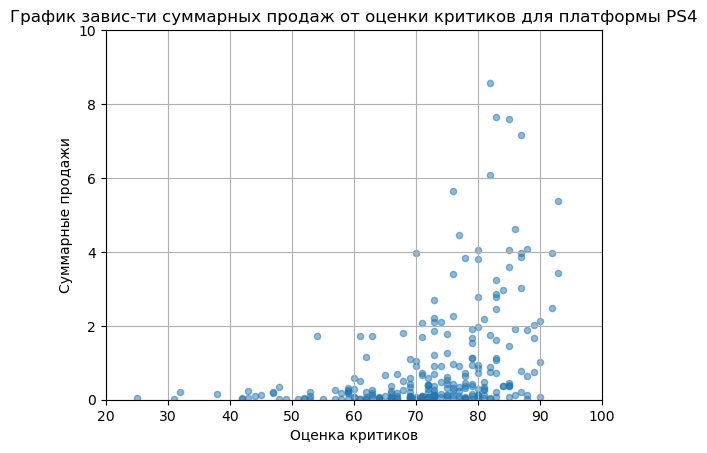

In [38]:
#КПП и график расеяния для PS4
print('ККП для платформы PS4', data_top5.query('platform == "PS4"')['critic_score']\
.corr(data_top5.query('platform == "PS4"')['sum_sales']))

data_top5.query('platform == "PS4"')\
.plot(x='critic_score', y='sum_sales', kind='scatter', \
      grid=True, alpha=0.5, xlim=(20, 100), ylim=(0, 10))
plt.title('График завис-ти суммарных продаж от оценки критиков для платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи');

#### PS3

ККП для платформы PS3 0.428212904129884


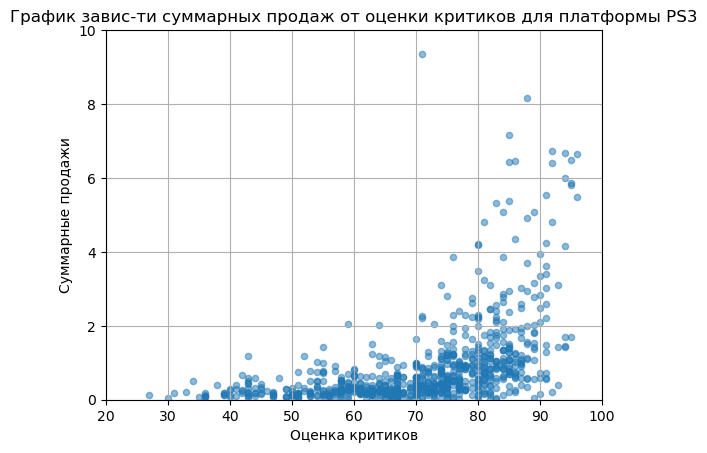

In [39]:
#КПП и график расеяния для PS3
print('ККП для платформы PS3', data_top5.query('platform == "PS3"')['critic_score']\
.corr(data_top5.query('platform == "PS3"')['sum_sales']))

data_top5.query('platform == "PS3"')\
.plot(x='critic_score', y='sum_sales', kind='scatter', \
      grid=True, alpha=0.5, xlim=(20, 100), ylim=(0, 10))
plt.title('График завис-ти суммарных продаж от оценки критиков для платформы PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи');

#### XOne

ККП для платформы XOne 0.41215586820316974


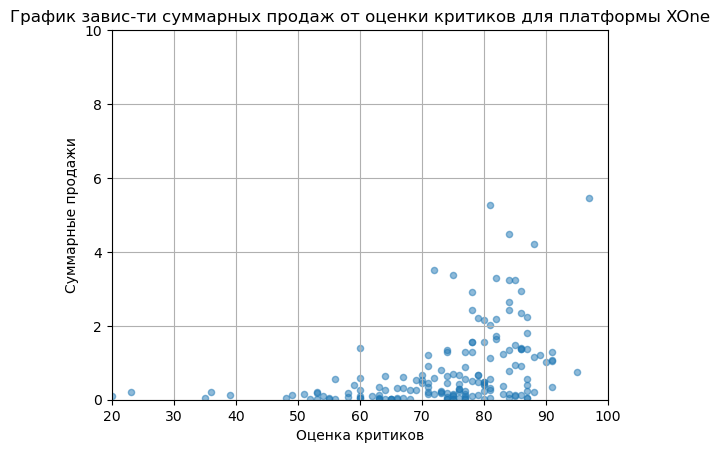

In [40]:
#КПП и график расеяния для XOne
print('ККП для платформы XOne', data_top5.query('platform == "XOne"')['critic_score']\
.corr(data_top5.query('platform == "XOne"')['sum_sales']))

data_top5.query('platform == "XOne"')\
.plot(x='critic_score', y='sum_sales', kind='scatter', \
      grid=True, alpha=0.5, xlim=(20, 100), ylim=(0, 10))
plt.title('График завис-ти суммарных продаж от оценки критиков для платформы XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи');

По графикам видно, что наш вывод верен и у каждой платформы имеется схожая слабая зависимость (коэффициент в пределах 0.35-0.45), но положит линейная зависимость оценки критиков от продажи.

### Влияние продаж от оценки пользователей

Теперь посмотрим на влияние продаж от оценки пользователей.
Но для расчетов нам мешает строковый тип данных столбца  user_score.

In [41]:
#изменим тип данных на числовой в столбце user_score для исходного датафрейма
data['user_score'] = data['user_score'].astype('float')
data['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

In [42]:
#изменим тип данных на числовой в столбце user_score для датафрейма ТОП-5
data_top5['user_score'] = data_top5['user_score'].astype('float')
data_top5['user_score'].head()

C:\Users\Irina\AppData\Local\Temp\ipykernel_15312\1272752352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top5['user_score'] = data_top5['user_score'].astype('float')


14    6.3
16    8.2
23    8.1
29    3.4
31    NaN
Name: user_score, dtype: float64

#### PS4

КПП для платформы PS4 -0.031957110204556376


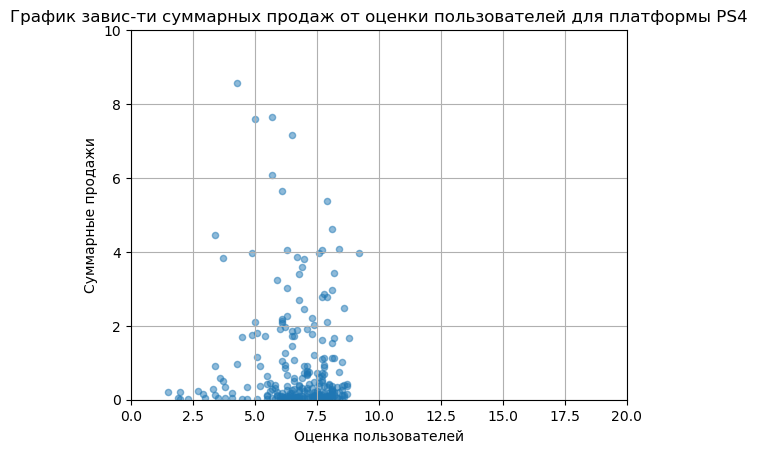

In [43]:
#КПП и график расеяния для PS4 от оценки пользователей
print('КПП для платформы PS4', data_top5.query('platform == "PS4"')['user_score']\
.corr(data_top5.query('platform == "PS4"')['sum_sales']))
      
data_top5.query('platform == "PS4"')\
.plot(x='user_score', y='sum_sales', kind='scatter',\
      grid=True, alpha=0.5, xlim=(0, 20), ylim=(0, 10))
plt.title('График завис-ти суммарных продаж от оценки пользователей для платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи');

3DS
critic_score    0.284686
user_score      0.215193
sum_sales       1.000000
Name: sum_sales, dtype: float64


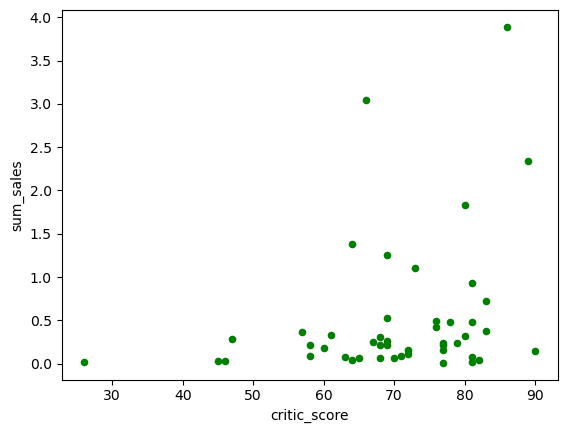

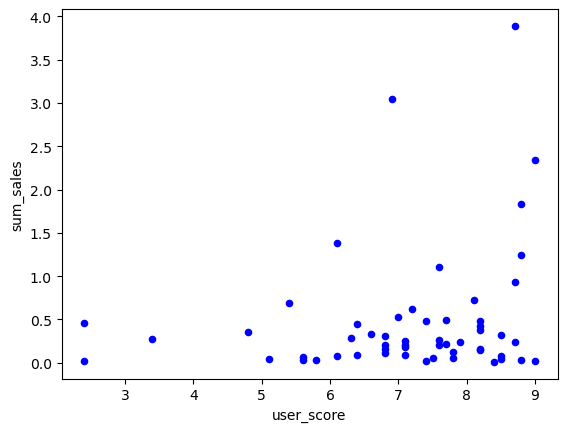

PS3
critic_score    0.446575
user_score     -0.166761
sum_sales       1.000000
Name: sum_sales, dtype: float64


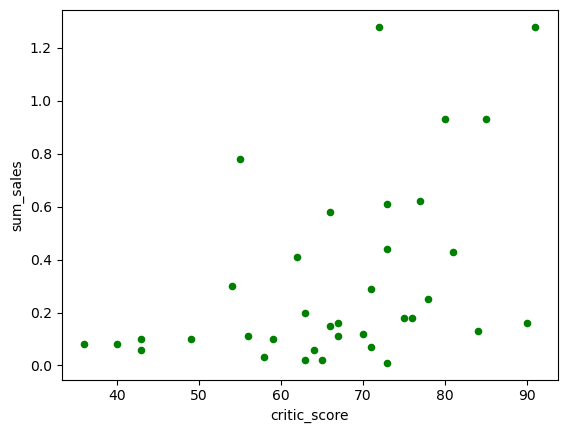

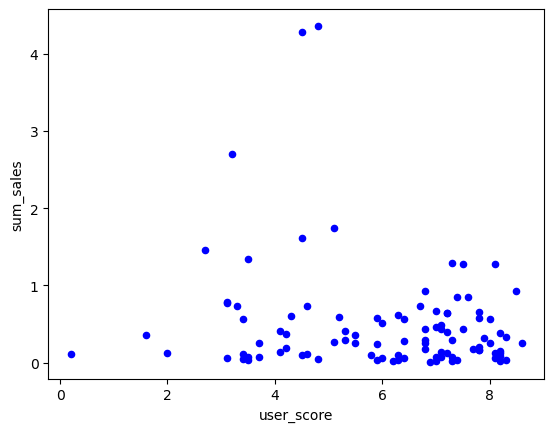

PS4
critic_score    0.402498
user_score     -0.040132
sum_sales       1.000000
Name: sum_sales, dtype: float64


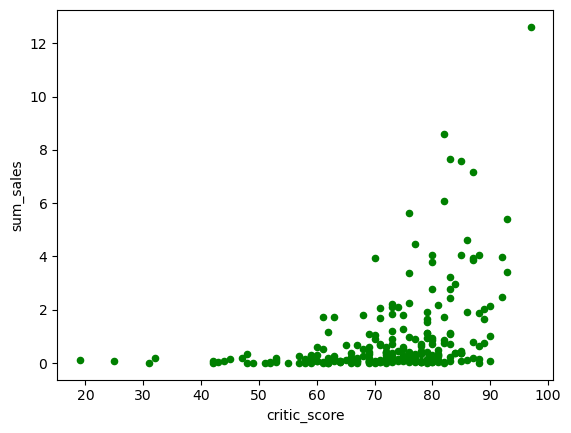

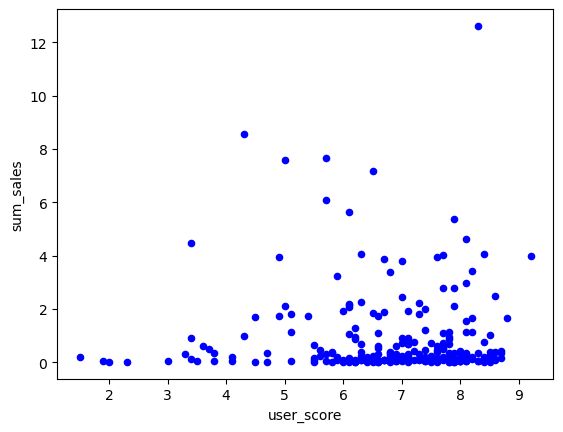

X360
critic_score    0.525723
user_score     -0.138445
sum_sales       1.000000
Name: sum_sales, dtype: float64


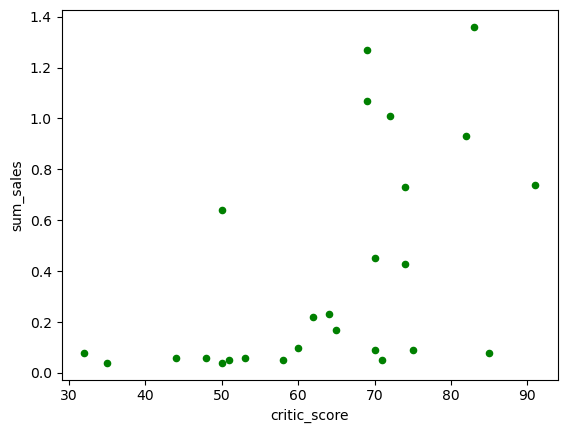

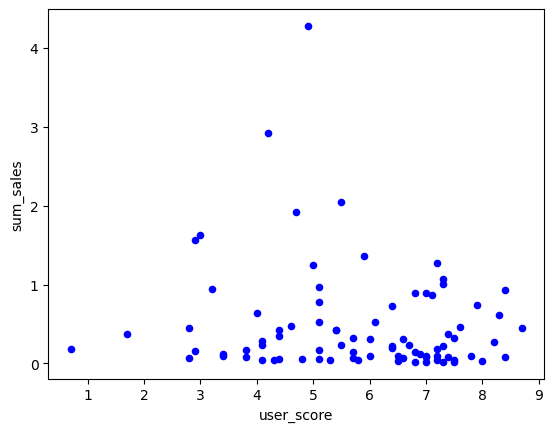

XOne
critic_score    0.424101
user_score     -0.070384
sum_sales       1.000000
Name: sum_sales, dtype: float64


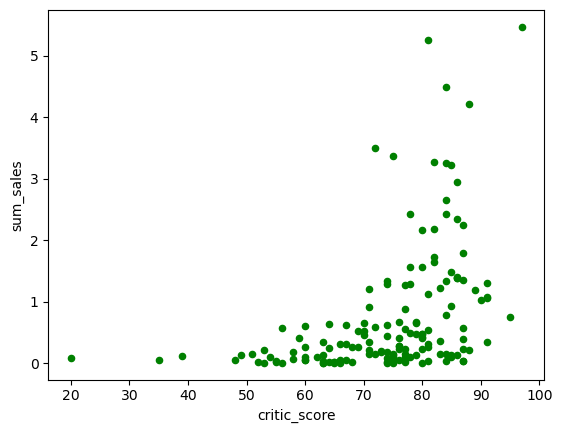

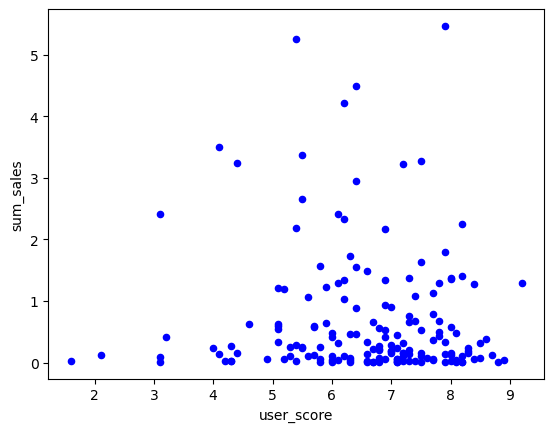

In [44]:
#построим аналогичные графики используя цикл
for platform, data_top5 in data_top5.query('year_of_release > 2013').groupby('platform'):
    print(platform)
    print(data_top5[['critic_score', 'user_score', 'sum_sales']].corr()['sum_sales'])
    data_top5.plot(kind='scatter', x='critic_score', y='sum_sales', color='green')
    data_top5.plot(kind='scatter', x='user_score', y='sum_sales', color='blue')
    plt.show()

Зависимость суммарных продаж от оценки пользователей есть, но она ооочень слабая, 
я бы сказала ничтожно мала. 
Для всех платформ кроме 3DS коэффициент корреляции отрицательный - и находится в диапазоне -0.02-0.13.

По сути мы видим, что оценка критиков влияют на суммарные продажи, хоть и слабо.
А вот оценка пользователей не влияет на суммы продаж - можно сделать подобный вывод.
Не стоит учитывать этот критерий при прогнозе, поскольку значения слишком маленькие и их можно списать на погрешности, взаимосвязи я здесь не вижу.

### Распределение игр по жанрам

In [45]:
#посмотрим какие вообще жанры представлены в таблице
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', nan,
       'Strategy'], dtype=object)

In [46]:
#построим сводную таблицу с группировкой по жанрам от медианных значений суммы продаж
data_genre = data.pivot_table(index='genre', values='sum_sales', aggfunc='median')\
.sort_values(by='sum_sales', ascending=False)
data_genre

,sum_sales
genre,
Platform,0.32
Shooter,0.28
Sports,0.27
Racing,0.24
Fighting,0.22
Action,0.20
Role-Playing,0.19
Misc,0.18
Simulation,0.18


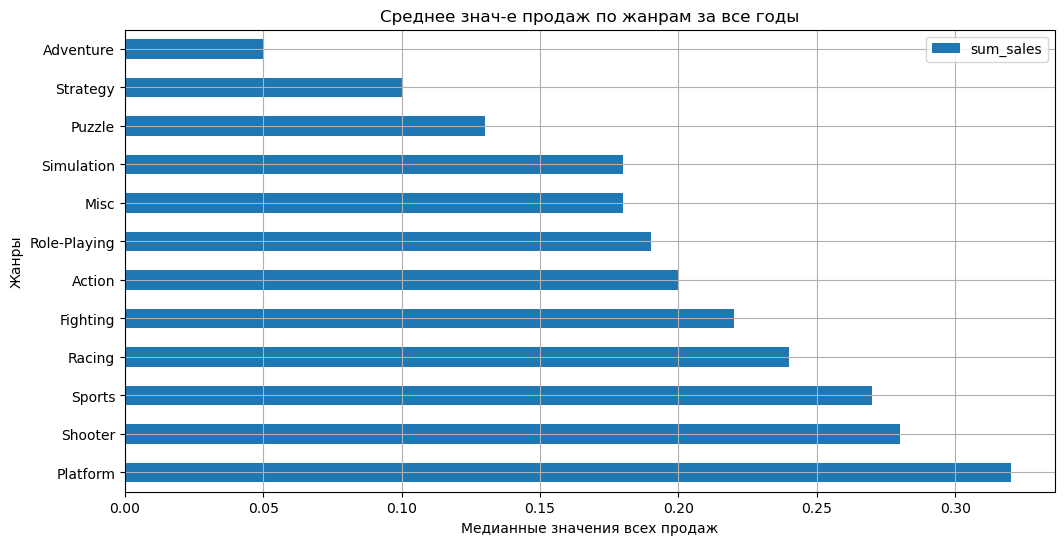

In [47]:
#строим гистограмму по жанрам и медианных значений продаж за весь период
data_genre.plot(grid=True, figsize=(12,6), kind='barh')
plt.title('Среднее знач-е продаж по жанрам за все годы')
plt.xlabel('Медианные значения всех продаж')
plt.ylabel('Жанры');

Теперь видим лидеров. Прослеживается плавное снижение суммарных продаж. Проверим, изменится ли ситуация, если взять только последние годы.

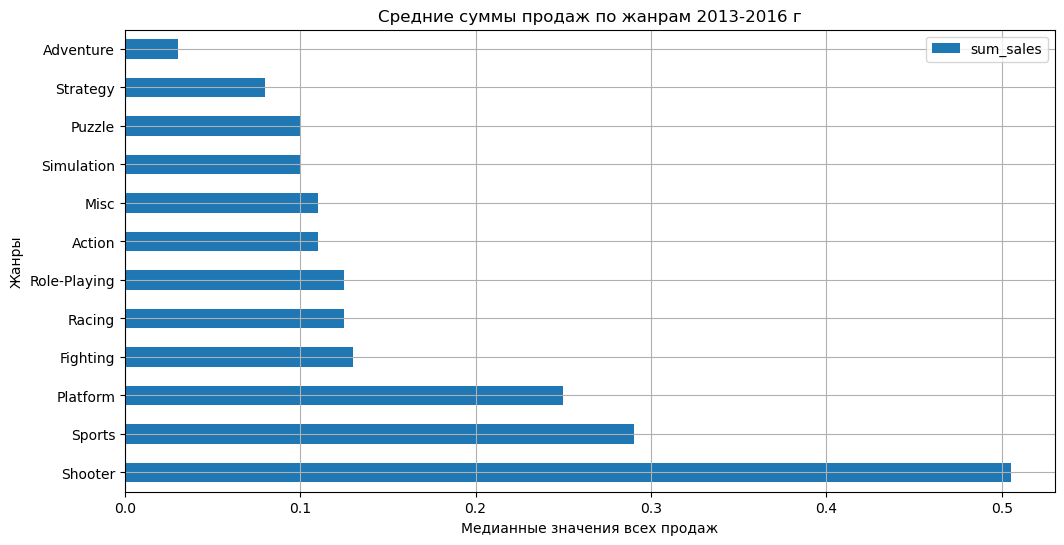

In [48]:
#построим аналогичный график, но для актуального периода 2013 - 2016 годы
data.query('year_of_release >= 2013')\
.pivot_table(index='genre', values='sum_sales', aggfunc='median')\
.sort_values(by='sum_sales', ascending=False)\
.plot(kind='barh', grid=True, figsize=(12,6))
plt.title('Средние суммы продаж по жанрам 2013-2016 г')
plt.xlabel('Медианные значения всех продаж')
plt.ylabel('Жанры');

Картина на самом деле немного поменялась. 
За последние годы виден явный один лидер и это Shooter - у него полумиллионные продажи.

И также наметилась тройка лидеров, которые выбиваются:
2 и 3 место занимают Sports (0.3) и Platform (0.25) соответсвенно.

Далее идет постепенный спад от жанра к жанру, в среднем около 0.1 миллиона копий по продажам.

При сравнении 2 периодов(весь период и последние годы) пятерка лидеров осталась прежней - 
это Shooter, Sports, Platform, Fighting и Racing. А вот порядок их лидерства изменился.

Что касается последнего места в списке, то он в обоих случаях достался жанру adventure (0.02).

## Портрет пользователя каждого региона

Определим для каждого региона (NA, EU, JP) популярные платформы и жанры в играх.

### Северная Америка

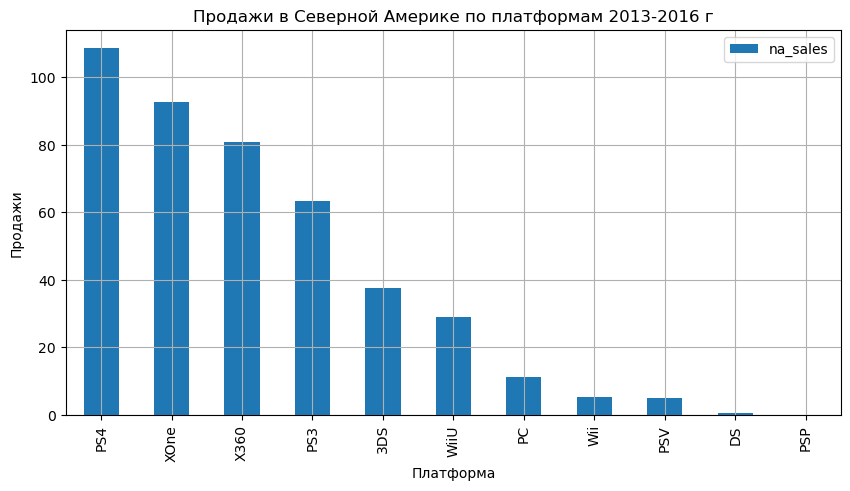

In [49]:
#график для Северной Америки по платформам с наибольшими продажами
data.query('year_of_release >= 2013')\
.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Продажи в Северной Америке по платформам 2013-2016 г')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

### Европа

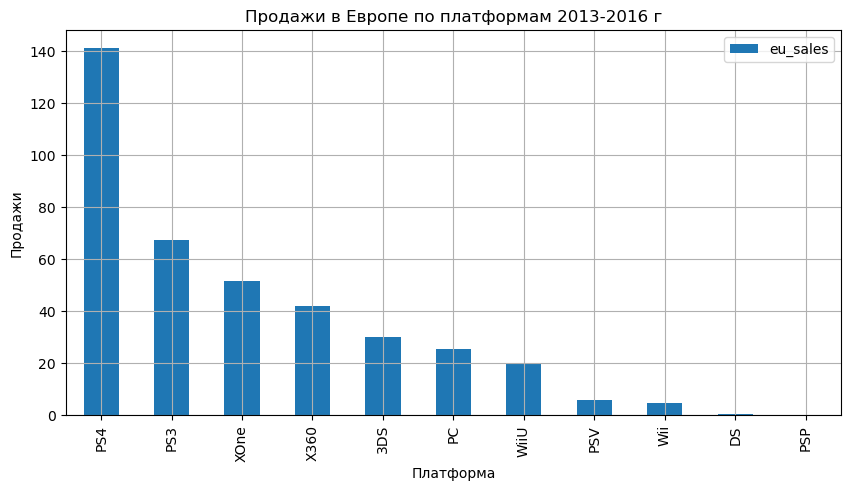

In [50]:
#график для Европы по платформам с наибольшими продажами
data.query('year_of_release >= 2013')\
.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Продажи в Европе по платформам 2013-2016 г')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

### Япония

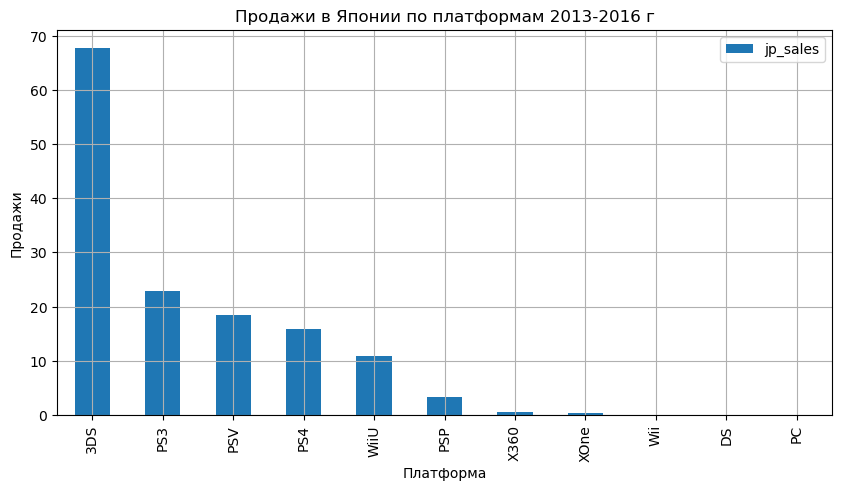

In [51]:
#график для Японии по платформам с наибольшими продажами
data.query('year_of_release >= 2013')\
.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Продажи в Японии по платформам 2013-2016 г')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

### ТОП-5 платформ

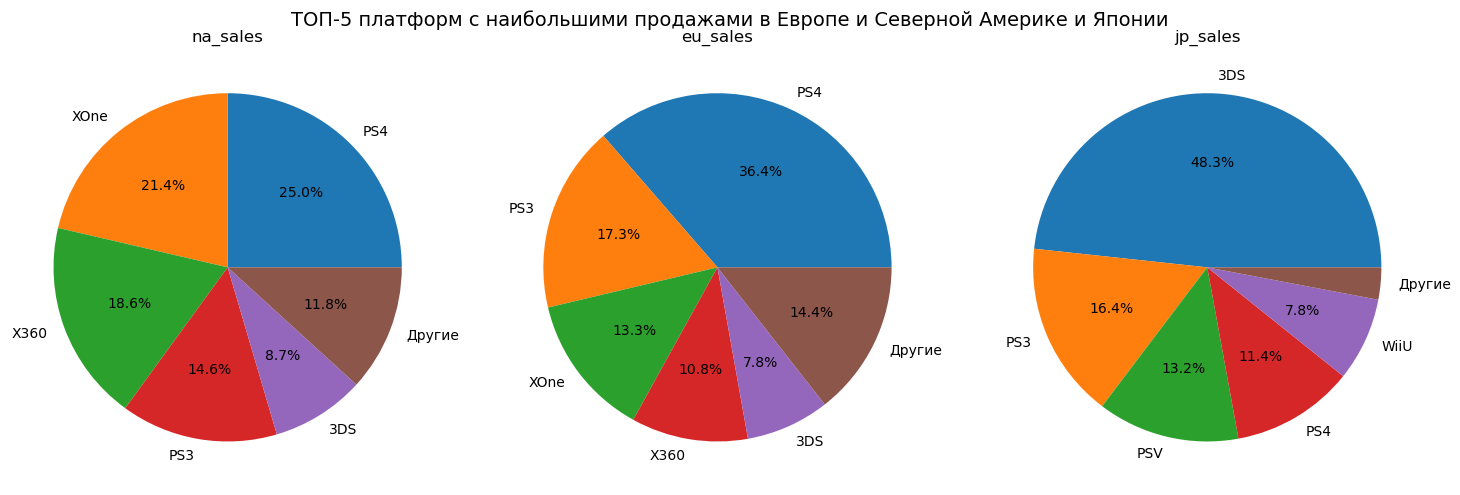

In [52]:
#определим ТОП-5 платформ и построим круговые диаграммы для них по долям распределения
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = data.query('year_of_release >= 2013').groupby('platform').agg({region: 'sum'})\
    .sort_values(by=region, ascending=False).reset_index()
    
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum()]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Для Америки распредение более плавно преставлено, 2 лидера PS4 и XOne - у них почти 50% продаж от всех платформ и они поделены между собой.

Для Европы же явный лидер - pS4 ( треть всех продаж), и похоже, что часть людей делают выбор именно в пользу него. 
Именьше продолжают играть в PS3 и XOne.

Для Японии бесспорный лидер 3DS - 48%, почт половин всех продаж. И это к сравнению в Европе и Америки в них играют менее 10% в каждом. В обновленную PS4 играет лишь 11%, а PS3 на 2 месте и на него приходится 16%.

### ТОП-5 жанров

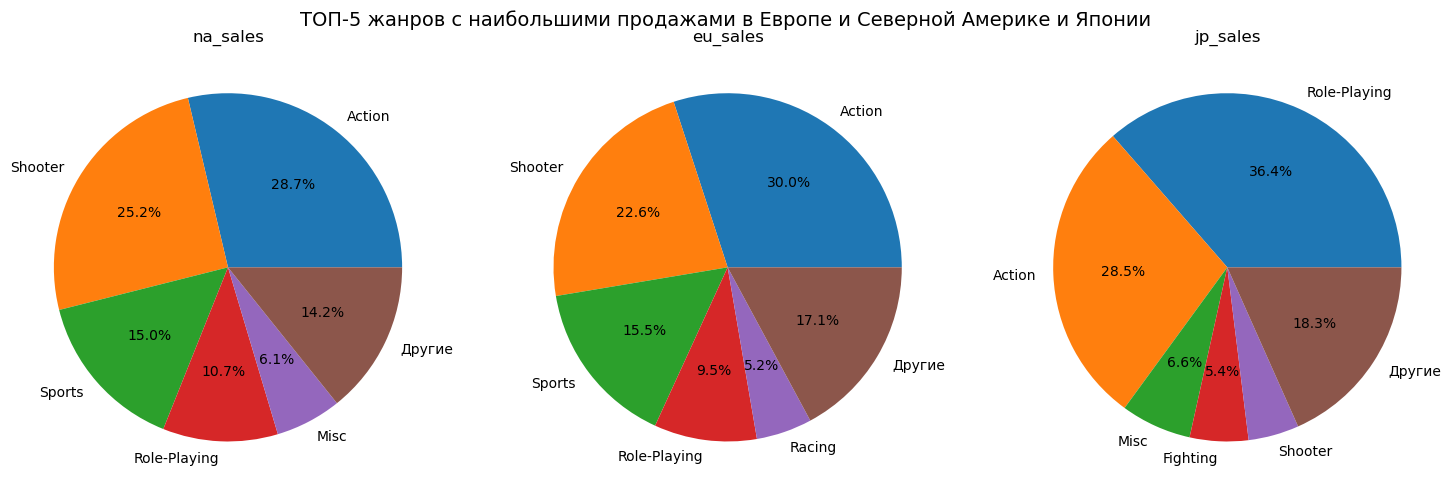

In [53]:
#определим ТОП-5 жанров и построим круговые диаграммы
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_genre = data.query('year_of_release >= 2013').groupby('genre').agg({region: 'sum'})\
    .sort_values(by=region, ascending=False).reset_index()
    
    region_genre.loc[5] = ['Другие', region_genre.loc[5:][region].sum()]
    region_top_genre = region_genre.head(6)        
    ax[i].pie(region_top_genre[region], labels=region_top_genre['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В Америке и Европе очень схожее распределение. 
Лидирует жанр Action - 30% треть всех продаж. 

Чуть менее, но все же популярен жанр Shooter - 25%, четверть от всех продаж.

В Японии картина другая - там лидеры - Role-playing - 36% и Action 29%, 
они занимают больше половины от всех продаж.
А вот в Shooter японцы играют неохотно - менее 5% таких игроманов.

### Влияние рейтинга ESRB

Теперь посмотрим влияет ли рейтинг ESRB на продажи в регионах.
ESRB - Entertainment Software Rating Board — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Давайте вспомним какие значения рейтинга у нас использованы в датафрейме

In [54]:
#отсортируем все возможные значения по количеству
data['rating'].value_counts()

unknown    6626
T          2536
E          2373
M          1494
E10+       1033
Name: rating, dtype: int64

Unknown - рейтинг неопределен \
T (Teen) — подросткам, от 13 лет \
E (Everyone) — для всех \
M (Mature) — для взрослых \
E10+ (Everyone 10 and older) — для всех от 10 лет и старше

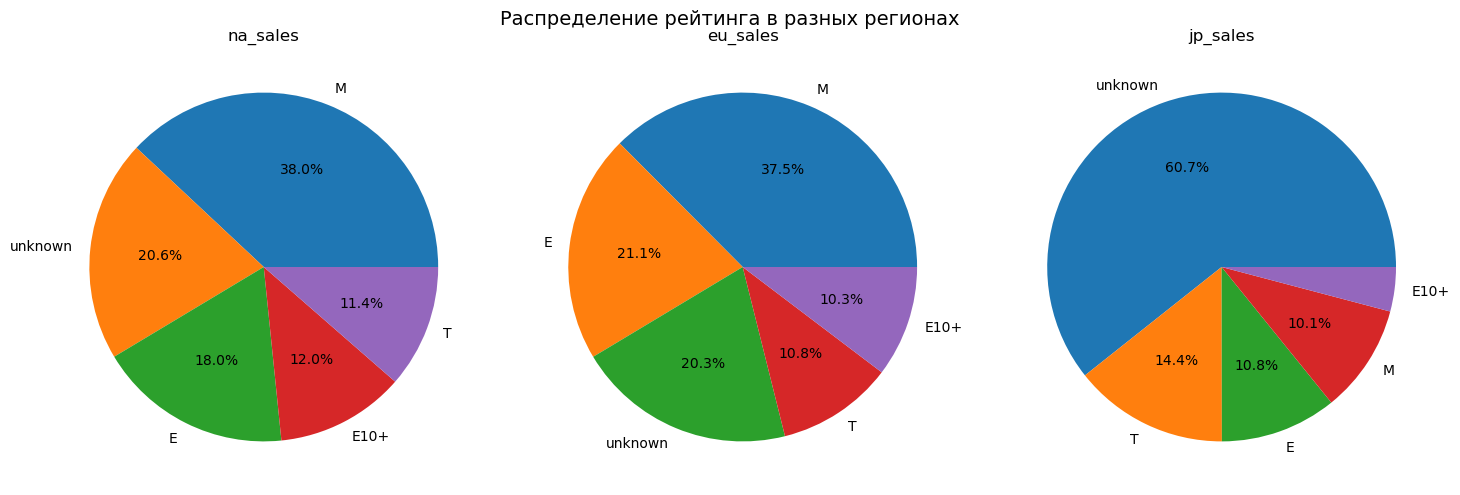

In [55]:
#построим круговые диаграммы по долям распределения рейтинга для разных регионов
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_rating = data.query('year_of_release >= 2013').groupby('rating').agg({region: 'sum'})\
    .sort_values(by=region, ascending=False).reset_index()
    
    ax[i].pie(region_rating[region], labels=region_rating['rating'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('Распределение рейтинга в разных регионах', fontsize=14)
plt.tight_layout()
plt.show()

На диаграммах продолжаем видеть схожую картину для Европы и Америки. Наибольшую долю 38% составляют игры для взрослых, далее 2 и 3 место примерно одинаково порядка 20% каждый неопределенный рейтинг и рейтинг Е. 
И замыкают по 10-12% рейтинги T и E10+.

А вот в Японии совершенно другой подход к играм. Превалирующее большинство игр без рейтинга - 2\3 от всех игр (60%). Это означает, что в Японии рейтинги не проставляют играм.

Рейтинг для подростков всего 14% от общего числа продаж. 
И 10% и менее для других видов рейтинга.

## Проверка гипотез

### 1. Средние пользовательские рейтинги платформ XOne и PC одинаковые

H0 - Среднее значение пользовательского рейтинга для платформы XOne равно аналогичному значению для платформы PC.
        
H1 - Среднее значение пользовательского рейтинга для платформы XOne не равно аналогичному значению для платформы PC.

In [56]:
from scipy import stats as st #импортируем библиотеки для расчета гипотез
import numpy as np

#исключаем из столбца значения. которые могут помешать расчету (nan, unknown)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

#создаем выборки по срезу данных из общего датафрейма
data_xone = data.query('year_of_release >= 2013 and platform == "XOne"')['user_score'].dropna().astype('float')
data_pc = data.query('year_of_release >= 2013 and platform == "PC"')['user_score'].dropna().astype('float')

#определяем пороговое значение для статистики
alpha = 0.05

#определение pvalue
results = st.ttest_ind(data_xone, data_pc, equal_var=False)
print('p-значение', results.pvalue)

#сравниваем pvalue с критическим значением
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Итак, мы выдвинули гипотезу о равенстве двух выборок, 
и даже поставили под сомнение, что их дисперсии совпадают.

После проведения стат анализа выяснилось, что нашу гипотезу не удалось отвергнуть 
и есть вероятность равенства выборок по платформам XOne и PC со значением 0,14.

### 2. Средние пользовательские рейтинги жанров Action и Sports разные

H0 - Среднее значение пользовательского рейтинга жанра Action равно аналогичному значению для жанра Sports.

H1 - Среднее значение пользовательского рейтинга жанра Action не равно аналогичному значению для жанра Sports.

In [57]:
from scipy import stats as st #импортируем библиотеки для расчета гипотез
import numpy as np

#исключаем из столбца значения. которые могут помешать расчету (nan, unknown)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

#создаем выборки по срезу данных из общего датафрейма
data_action = data.query('year_of_release >= 2013 and genre == "Action"')['user_score'].dropna().astype('float')
data_sports = data.query('year_of_release >= 2013 and genre == "Sports"')['user_score'].dropna().astype('float')

#определяем пороговое значение для статистики
alpha = 0.05

#определение pvalue
results = st.ttest_ind(data_action, data_sports, equal_var=False)
print('p-значение', results.pvalue)

#сравниваем pvalue с критическим значением
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
     print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Наша нулевая гипотеза о равенстве выборок для 2 жанров отвергнула, ввиду того, 
что вероятность ее ничтожно мала.
Даже если бы мы использовали пороговое значение 0.01, то она также была бы отвергнута.

Значит, наша альтернативная гипотеза о неравенстве этих выборок не может быть отвергнута.

## Вывод

1. Названия с низкими показателями по продажам не были задействованы в рейтингах и  оценках, 
т.е. это совсем малоизвестные игры.

2. В данных в столбцах user_score и rating порядка 40% пропусков. 
Скорее всего данные столбцы не обязательны к заполнению.

3. В столбце user_score содердится странная аббревеатура TBD. 
От английского To Be Determined (будет определено) или To Be Decided (будет решено). 
Используется, если какая-то информация еще не определена или решение по вопросу не принято.
Скорее всего это значение означает, что пользователи еще не успели выставить свои оценки, 
но они ожидаются в ближайшее время.

4. Данные представлены за годы - с 1980 по 2016, причем в 2016 году были неполные данные.
С 1980 года по 1995 год только зарождалась индустрия компьютерных игр, и их было мало - до 200.
С 1995 года был плавный рост игр до пика в 2007 году. Также есть незначительный всплекс в 2002 году. 
Пик компьютерных игр пришелся на 2007-2008 годы. За эти 2 года выпускалось по 1400 игр. 
И далее идет спад игромании до 600 игр за год.

5. ТОП-6 платформ по количеству суммарных продаж за весь период - PS2, X360, PS3, Wii, DS, PS

6. Средняя продолжительность жизни платформы - около 10 лет. 
Только у одной PS продажи длились почти 20 лет. Полагаю, что это связано с тем, 
что она была одной из первых платформ в эпоху рождения компьютерных игр, поэтому
и была популярной столько долгое время. 

7. только 3 платформы (PS3, Wii, X360) из 6 актуальны с 2013 года (были продажи), и даже они на самом спаде своего цикла жизни.

8. В качестве актуального промежутка времени период с 2013 года по 2016 год, не более. Потому что топовые платформы отмирают, и на их смену как раз в последние 2-3 года приходят новые "восходящие" платформы, которые еще не успели набрать слишком много продаж.

9. потенциально прибыльные платформы с 2013 года - PS4, PS3, XOne, 3DS, X360. 

10. Почти по всем лидирующим платформам падают показатели. Они находятся на спаде. Я выделила бы отдельно лидера PS4 - у него в 2015 году было пиковое значение, 2016 небольшой спад, но при этом на него я бы сделала самую большую ставку, как лидера продаж.

11. У платформы 3DS самые низкие показатели по продажам из остальных. эту платформы я бы исключила из прогноза на 2017 год.

12. Остальные 4 платформы имеют очень схожие показатели медианных продаж и их можно однозначно использовать в прогнозе на 2017 год. Лидируют - X360 и PS3, далее совсем немного ниже медиана и Q1 - у PS4 и XOne.

13. у ТОП-5 платформ имеется слабая, но положит линейная зависимость оценки критиков от продажи. Коэффициент корреляции ~ 0.3.

А вот оценка пользователей не влияет на суммы продаж (слишком малые значения коэффициента корреляции).
Не стоит учитывать этот критерий при прогнозе.

14. Распределение по жанрам:
За последние годы виден явный один лидер по жанрам и это Shooter - у него полумиллионные продажи.
Тройка лидеров: 1 место - Shooter (0.5), 2 и 3 место занимают Sports (0.3) и Platform (0.25) соответственно.
Далее идет постепенный спад от жанра к жанру, в среднем около 0.1 миллиона копий по продажам.

При сравнении 2 периодов(весь период и последние годы) пятерка лидеров осталась прежней - это Shooter, Sports, Platform, Fighting и Racing. А вот порядок их лидерства изменился.
Самый плохопокупаемый жанр - adventure (0.02).
Причем последнее место он занимает как за последние годы (2013-2016), так и за весь период наблюдений.

15. Наибольшие продажи по регионам, платформы:
Для Европы же явный лидер - pS4 ( треть всех продаж), и похоже, что часть людей делают выбор именно в пользу него. И меньше продолжают играть в PS3 и XOne.

Для Японии бесспорный лидер 3DS - 48%, почт половин всех продаж. И это к сравнению в Европе и Америки в них играют менее 10% в каждом. В обновленную PS4 играет лишь 11%, а PS3 на 2 месте и на него приходится 16%.

16. Наибольшие продажи по регионам, жанры:
В Америке и Европе очень схожее распределение. Лидирует жанр Action - 30% треть всех продаж.
Чуть менее, но все же популярен жанр Shooter - 25%, четверть от всех продаж.
В Японии картина другая - там лидеры - Role-playing - 36% и Action 29%, они занимают больше половины от всех продаж. А вот в Shooter японцы играют неохотно - менее 5% таких игроманов.

17. На диаграммах продолжаем видеть схожую картину для Европы и Америки. Наибольшую долю 38% составляют игры для взрослых, далее 2 и 3 место примерно одинаково порядка 20% каждый неопределенный рейтинг и рейтинг Е. И замыкают по 10-12% рейтинги T и E10+.
А вот в Японии совершенно другой подход к играм. Превалирующее большинство игр без рейтинга - 2\3 от всех игр (60%). Это означает, что в Японии рейтинги не проставляют играм.

Рейтинг для подростков всего 14% от общего числа продаж. И 10% и менее для других видов рейтинга.

18. Выдвинутая гипотеза о равенстве выборок между платформами XOne и PC не удалось отвергнуть, есть вероятность равенства выборок со значением 0,14.

19. Альтернативная гипотеза о неравенстве выборок для жанров Action и Sports не может быть отвергнута, с пороговым значением 0.01.